# Iris Dataset - Multiclass Classification Task

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Sepal Length (cm)

Sepal Width (cm)

Petal Length (cm)

Petal Width (cm)

Species - Target Variable


## Solution involves following steps:

### 1. Importing the Basic Libraries required 
### 2. Defining basic functions -  to print score summary of cross validation and to save visualizations
### 3. Importing data from csv file and evaluation of summary statistics
### 4. Exploratory Data Analysis to see patterns in data
### 5. Splitting Dataset into Training and Testing set 
### 6. Normalization of data through MinMaxScaler
### 7. Selecting a model through cross_val_score 
### 8. Fine tuning best performing model through Grid Search CV
### 9. Testing of fine tuned model on Test set - 100% Accuracy
### 10. Tackling the same problem through Artificial Neural Network using Keras
### 11. Validating ANN through Test set - 100% Accuracy
### 12. Saving models using Joblib
### 13. Creating a Pipleine to get predicition of Species class on new data
### 14. Streamlining process to test various Classifiers using Cross Validation Score through a Pipeline

## Kindly provide suggestions to improve the model.


## 1. Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings(action='ignore')

## 2. Defining Basic Functions

In [2]:
sns.set_style('whitegrid')

# to print summary of cross validation score
def score_summary(scores):
    print ('cv_scores: ',scores)
    print ('mean: ',np.mean(scores))
    print ('std. deviation: ',np.std(scores))

# to save visualisations as png images
def save_figure(fig_id):
    path = os.path.join('iris_images_' + fig_id + '.png')
    plt.savefig(path, dpi=300, format='png')

## 3. Importing Data and Summary statistics

In [3]:
df = pd.read_csv('IRIS.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### No null values.Target feature is categorical.

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

### Balanced dataset.

## 4. Exploratory Data Analysis

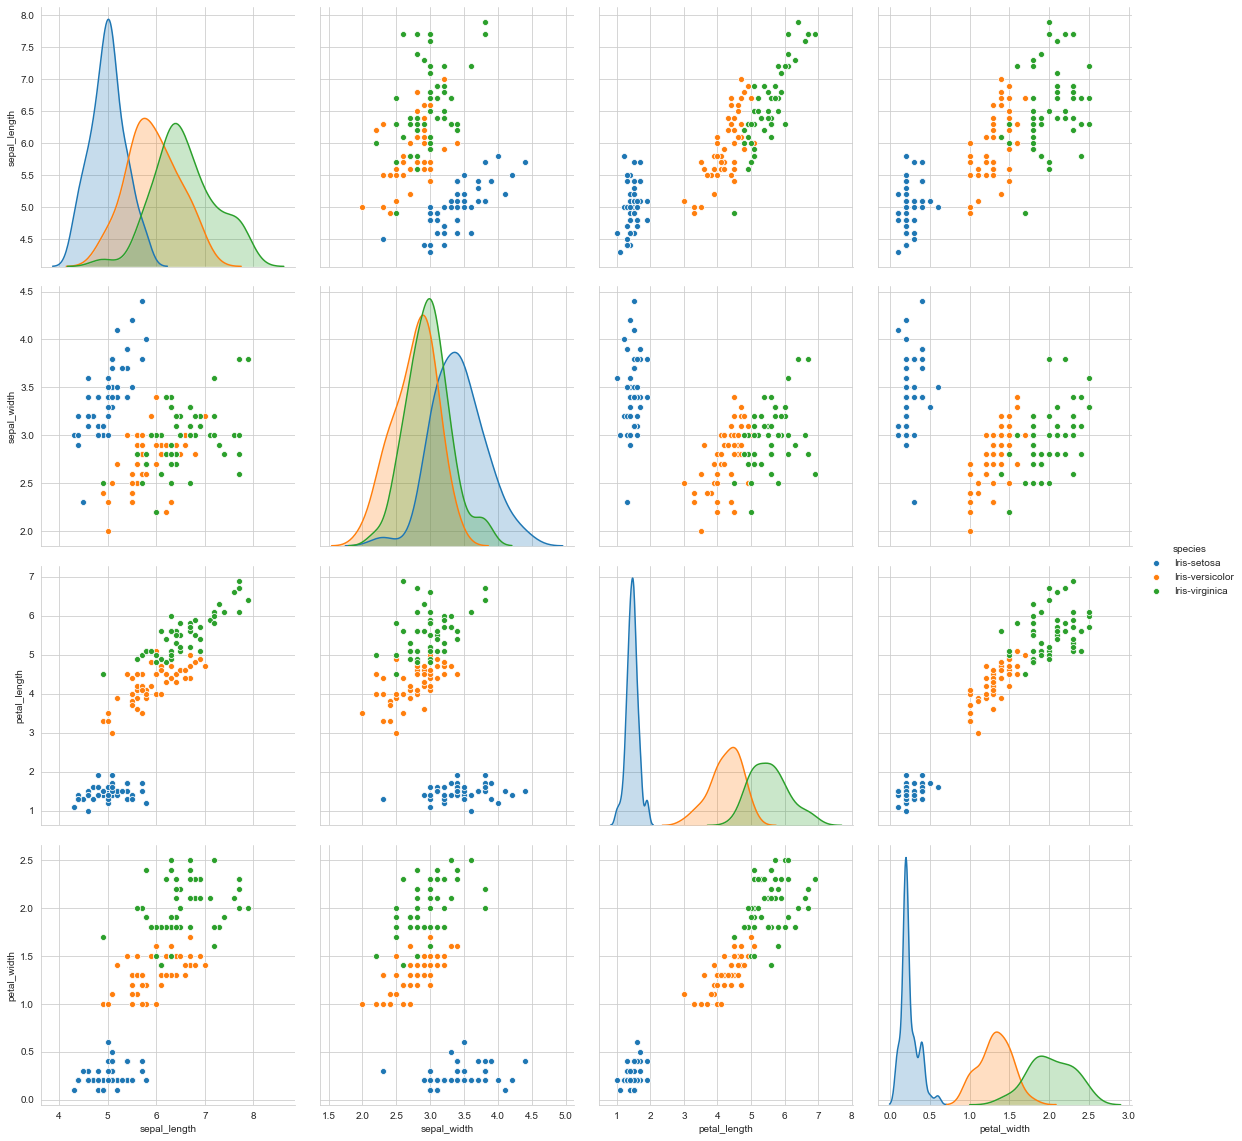

In [8]:
sns.pairplot(df, height=4, hue = 'species')
save_figure('1')

### Setosa (blue) is linearly separable from the rest.

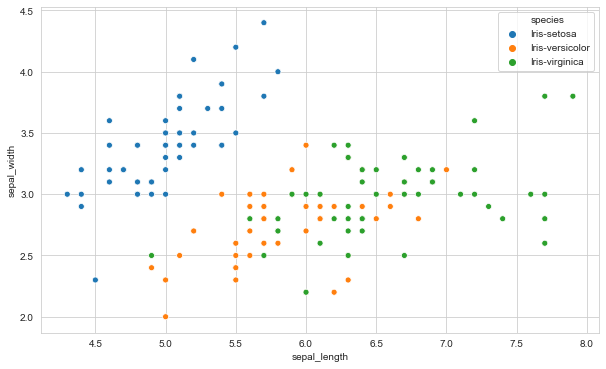

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
save_figure('2')

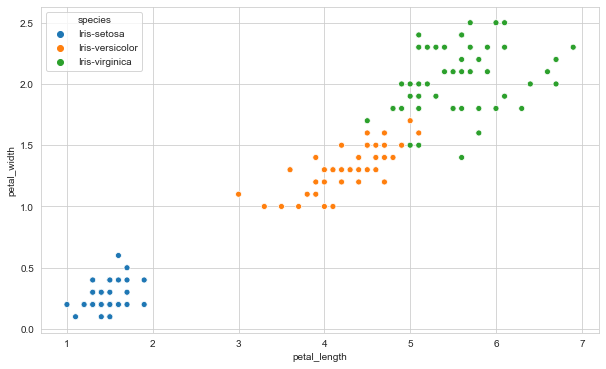

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
save_figure('3')

### Virsicolor (orange) and Virginica (green) do not seem linearly separable from each other.

In [11]:
# raw correlation between features
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


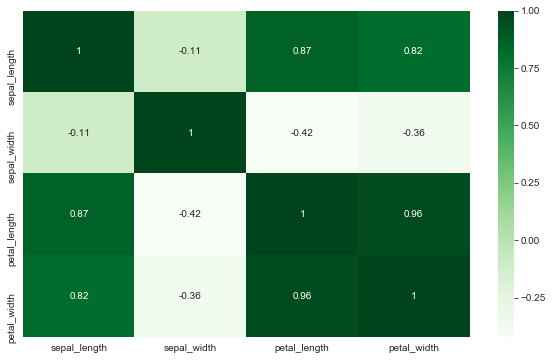

In [12]:
# plotting heatmap to visualise correlation among features
plt.figure(figsize=(10,6))
ax = sns.heatmap(df.corr(), annot=True, cmap='Greens')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)  # to correct glitch in seaborn that clips the matrix from top and bottom
save_figure('4')

### Strong correlation of sepal_length with sepal_width and petal_length

# 5. Splitting data into Train and Test set to prevent Snooping Bias 


In [13]:
X = df.drop('species', axis=1)
y = df['species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['species'])

# 6. Pre-processing : Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.02777778,  0.41666667,  0.03448276,  0.04166667],
       [ 0.5       ,  0.41666667,  0.65517241,  0.70833333],
       [ 0.16666667,  0.16666667,  0.37931034,  0.375     ],
       [ 0.19444444,  0.125     ,  0.37931034,  0.375     ],
       [ 0.02777778,  0.5       ,  0.03448276,  0.04166667],
       [ 0.55555556,  0.54166667,  0.62068966,  0.625     ],
       [ 0.08333333,  0.66666667, -0.01724138,  0.04166667],
       [ 0.30555556,  0.58333333,  0.10344828,  0.04166667],
       [ 0.61111111,  0.41666667,  0.70689655,  0.79166667],
       [ 0.30555556,  0.41666667,  0.5862069 ,  0.58333333],
       [ 0.83333333,  0.375     ,  0.89655172,  0.70833333],
       [ 0.72222222,  0.45833333,  0.68965517,  0.91666667],
       [ 0.61111111,  0.41666667,  0.81034483,  0.875     ],
       [ 0.58333333,  0.5       ,  0.5862069 ,  0.58333333],
       [ 0.19444444,  0.58333333,  0.06896552,  0.04166667],
       [ 0.19444444,  0.54166667,  0.05172414,  0.04166667],
       [ 0.41666667,  0.

# 7. Choosing a better performing model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=250)
log_reg_clf.fit(X_train, y_train)
log_reg_clf_scores = cross_val_score(log_reg_clf, X_train, y_train, cv=5)
score_summary(log_reg_clf_scores)

cv_scores:  [0.95833333 0.95833333 0.95833333 0.95833333 1.        ]
mean:  0.9666666666666668
std. deviation:  0.016666666666666653


In [16]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
sgd_clf_scores = cross_val_score(sgd_clf, X_train, y_train, cv=5)
score_summary(sgd_clf_scores)

cv_scores:  [0.79166667 0.75       0.83333333 0.875      0.66666667]
mean:  0.7833333333333333
std. deviation:  0.0716860438920219


In [17]:
from sklearn.svm import SVC
svc_clf = SVC(gamma='auto')
svc_clf.fit(X_train, y_train)
svc_clf_scores = cross_val_score(svc_clf, X_train, y_train, cv=5)
score_summary(svc_clf_scores)

cv_scores:  [1.         1.         0.95833333 1.         0.95833333]
mean:  0.9833333333333334
std. deviation:  0.020412414523193135


In [18]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf_scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
score_summary(dt_clf_scores)

cv_scores:  [0.95833333 0.95833333 0.95833333 0.95833333 0.91666667]
mean:  0.95
std. deviation:  0.016666666666666698


In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
score_summary(rf_clf_scores)

cv_scores:  [0.91666667 0.95833333 0.95833333 0.95833333 0.95833333]
mean:  0.95
std. deviation:  0.016666666666666698


In [20]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(n_estimators=100, max_samples=0.8)
bag_clf.fit(X_train, y_train)
bag_clf_scores = cross_val_score(bag_clf, X_train, y_train, cv=5)
score_summary(bag_clf_scores)

cv_scores:  [0.91666667 0.95833333 0.95833333 0.91666667 0.95833333]
mean:  0.9416666666666667
std. deviation:  0.020412414523193187


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf_scores = cross_val_score(gb_clf, X_train, y_train, cv=5)
score_summary(gb_clf_scores)

cv_scores:  [0.91666667 0.95833333 0.95833333 0.91666667 1.        ]
mean:  0.95
std. deviation:  0.0311804782231162


In [22]:
from xgboost import XGBClassifier
xgbc_clf  = XGBClassifier(n_estimators=500, objective='multi:softmax')
xgbc_clf.fit(X_train, y_train)
xgbc_clf_scores = cross_val_score(xgbc_clf, X_train, y_train, cv=5)
score_summary(xgbc_clf_scores)

cv_scores:  [0.95833333 0.95833333 0.95833333 0.95833333 0.95833333]
mean:  0.9583333333333334
std. deviation:  0.0


## SVC has performed best.

# 8. Fine Tuning SVC Model

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C':[8,9,10, 11, 12, 15 ],
    'gamma':[ .01,.02, 0.05, .001]
}

grid = GridSearchCV(svc_clf, param_grid, cv=30)
grid.fit(X_train, y_train)

/Users/ravi/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=30, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [8, 9, 10, 11, 12, 15],
                         'gamma': [0.01, 0.02, 0.05, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
grid.best_params_

{'C': 8, 'gamma': 0.05}

In [25]:
best_model = grid.best_estimator_

# 9. Testing on Test set

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
best_pred = best_model.predict(X_test)
print(classification_report(y_test, best_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# 10. Using ANN

In [27]:
# changing categorical feature (species) to numerical for ANN 
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
dummy_y_train = np_utils.to_categorical(encoded_y_train)

encoder.fit(y_test)
encoded_y_test = encoder.transform(y_test)
dummy_y_test = np_utils.to_categorical(encoded_y_test)

Using TensorFlow backend.


In [28]:
dummy_y_train.shape

(120, 3)

In [29]:
dummy_y_test.shape

(30, 3)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.activations import elu, relu, sigmoid, softmax

dl_model = Sequential()

dl_model.add(Dense(units=4, activation='elu'))
dl_model.add(Dense(units=8, activation='elu'))
dl_model.add(Dense(units=3, activation='softmax'))

dl_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
dl_model.fit(x=X_train.values, y=dummy_y_train, epochs=1000, verbose=0)

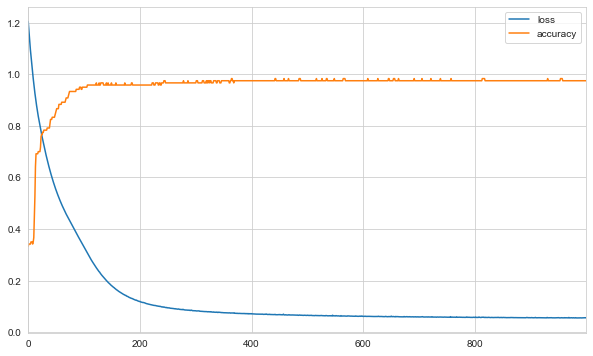

In [32]:
dl_model_loss = pd.DataFrame(dl_model.history.history)
dl_model_loss.plot(figsize=(10,6))

# 11. Testing on Test set

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
dl_pred = dl_model.predict(X_test.values)
dl_pred.shape

(30, 3)

In [34]:
confusion_matrix(np.argmax(dummy_y_test,axis=1), np.argmax(dl_pred,axis=1))

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

In [35]:
print(classification_report(np.argmax(dummy_y_test,axis=1), np.argmax(dl_pred,axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 12. Creating Pipeline to Make Predictions on New Data Using SVC

In [36]:
from sklearn.pipeline import Pipeline

some_data = [[3.1, 3.1, 1.4, 0.8]]

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('svc', grid.best_estimator_)
])

model = pipeline.fit(X_train, y_train)
pipeline.predict(some_data)

array(['Iris-setosa'], dtype=object)

# 13. Model Persistence using Joblib

In [37]:
import joblib
from keras.models import load_model

joblib.dump(model, 'iris_model.pkl')
#loaded_model = joblib.load('iris_model.pkl')

dl_model.save('iris_dl_model.h5')
#loaded_dl_model = load_model('iris_dl_model.h5')

# 14. Pipeline to Test Various Classifiers using Cross Validation

In [38]:
clfs_pipeline = Pipeline([
    ('normalizer', MinMaxScaler()),
    ('clf', LogisticRegression())
])

clfs = [LogisticRegression(), SGDClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(),
       BaggingClassifier(), GradientBoostingClassifier(), XGBClassifier()]
for classifier in clfs:
    clfs_pipeline.set_params(clf=classifier)
    clfs_score = cross_val_score(clfs_pipeline, X_train, y_train, cv=5)
    print('--------------------------------------------------------------------')
    print(str(classifier))
    score_summary(clfs_score)

--------------------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
cv_scores:  [0.83333333 0.875      0.875      0.83333333 0.83333333]
mean:  0.85
std. deviation:  0.020412414523193135
--------------------------------------------------------------------
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=F